# For Glass Dataset

In [1]:
# KNN Classification
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
glass=pd.read_csv("C:/Users/icon/Downloads/glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

## Visualizations 

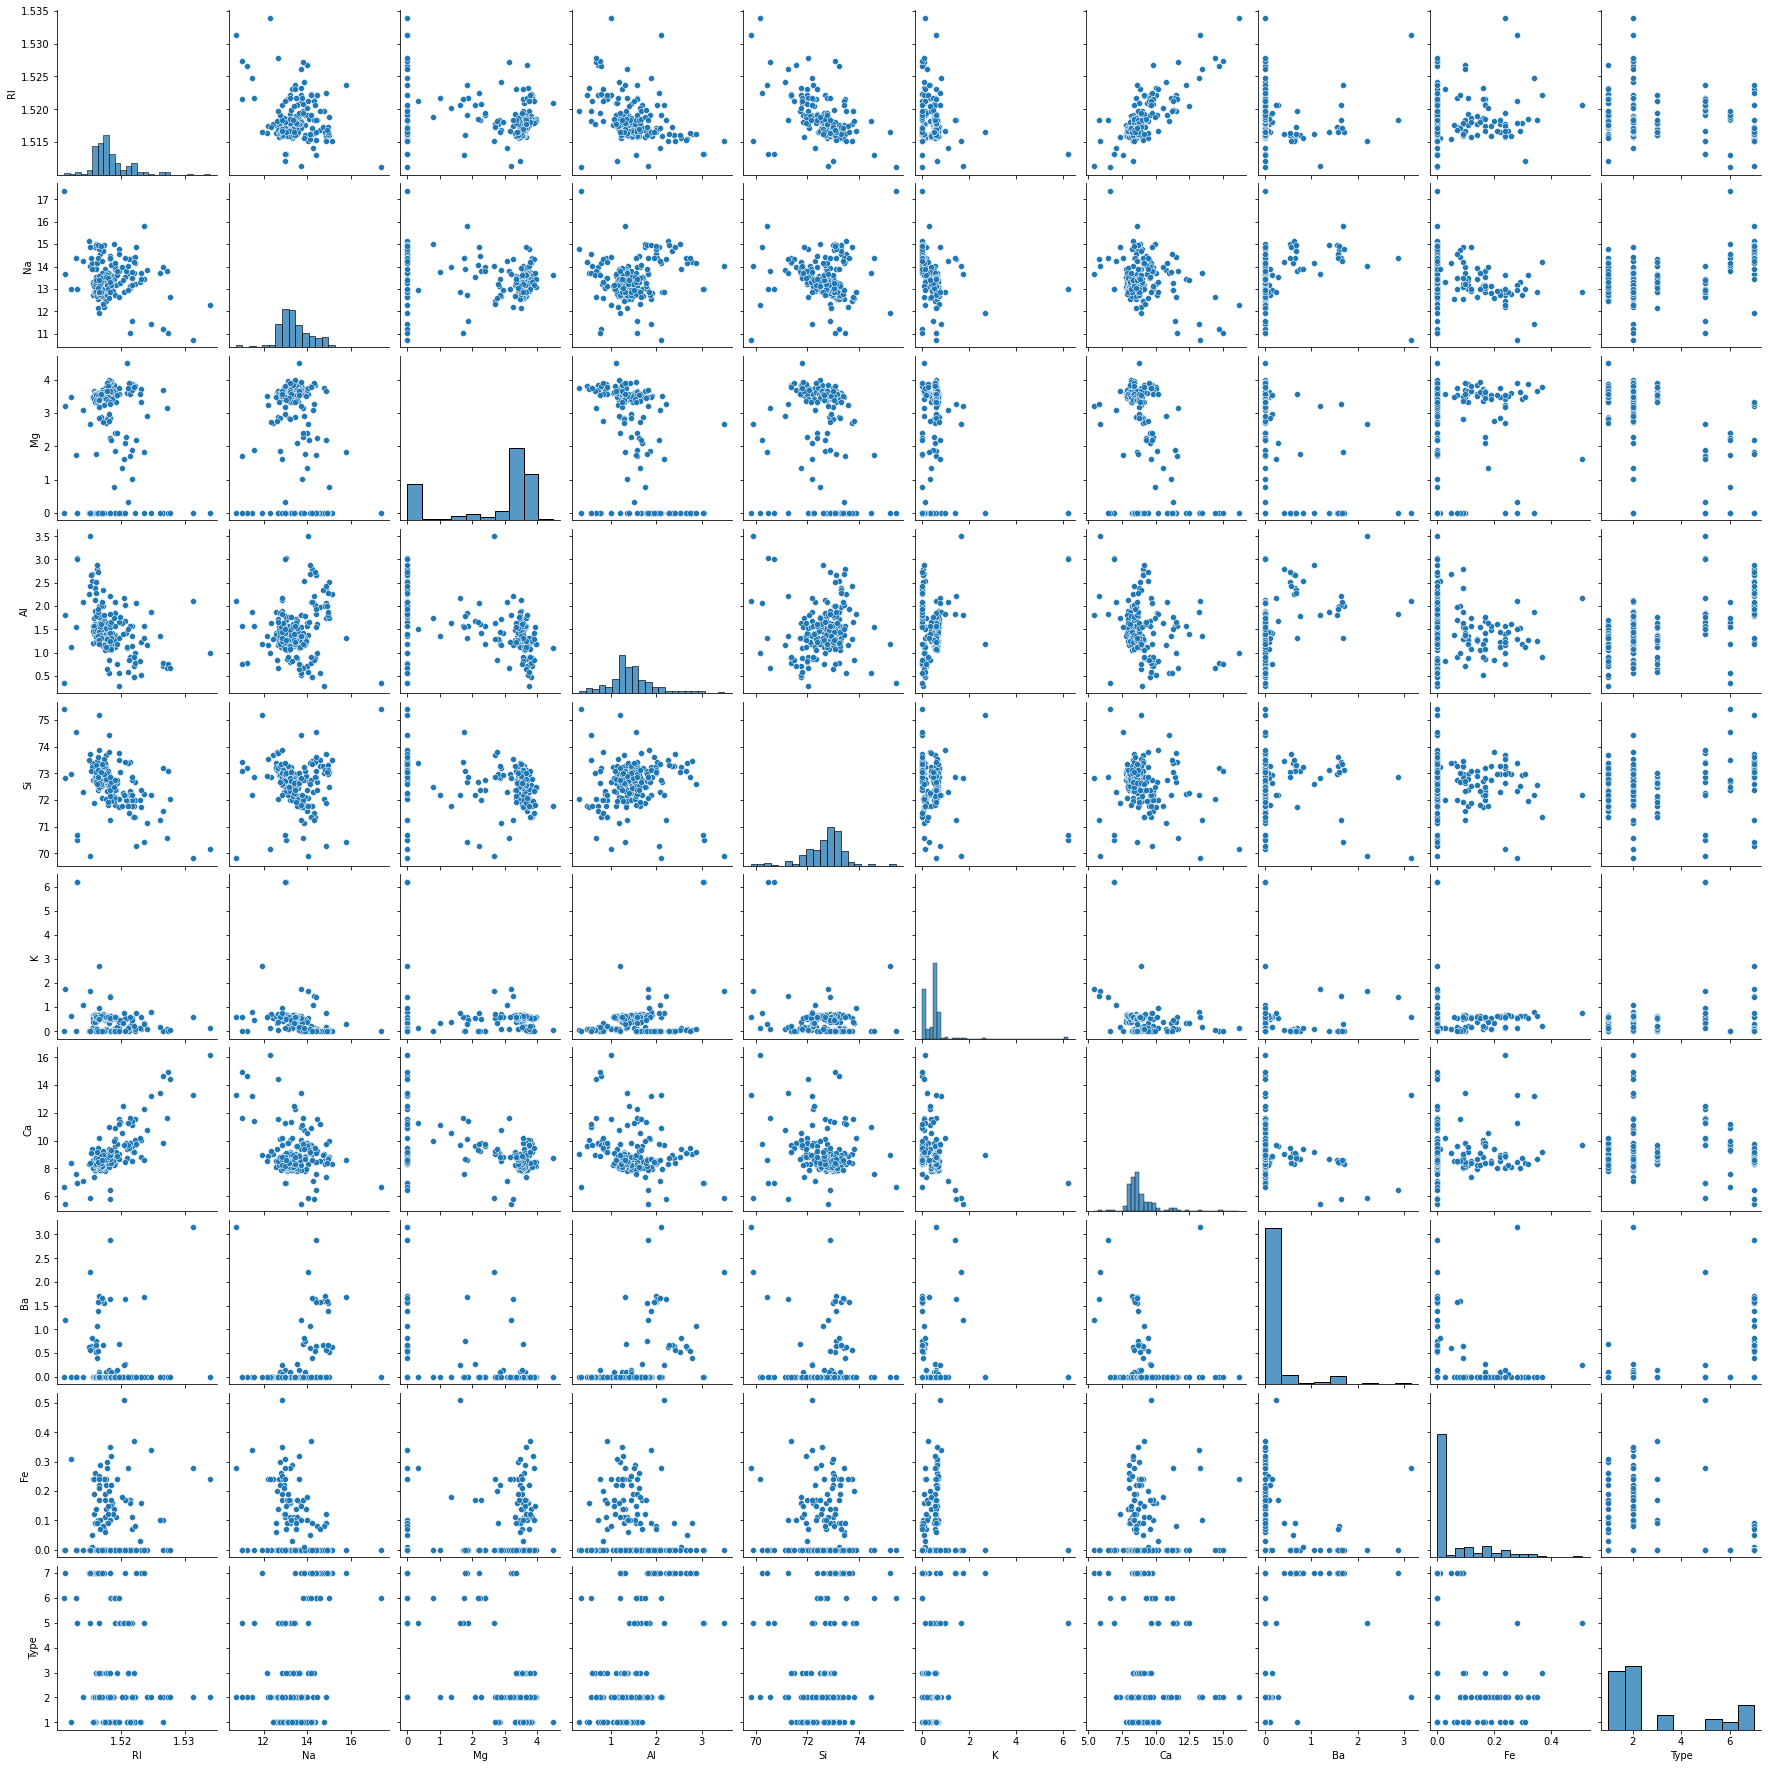

In [6]:
sns.pairplot(glass)

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na', ylabel='Mg'>

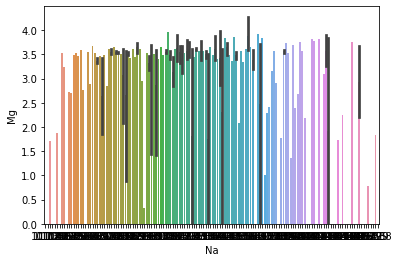

In [7]:
sns.barplot(glass['Na'],glass['Mg'])

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na', ylabel='Mg'>

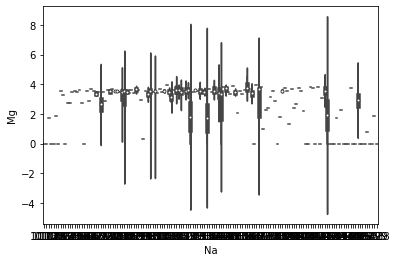

In [8]:
sns.violinplot(glass['Na'],glass['Mg'])

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

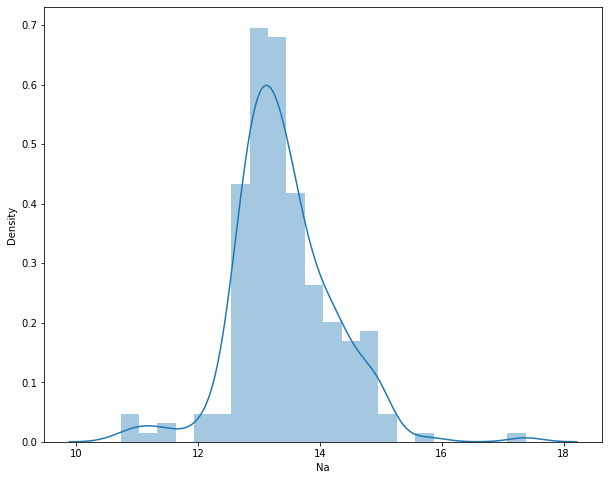

In [9]:
plt.figure(figsize=(10,8))
sns.distplot(glass['Na'])
plt.show

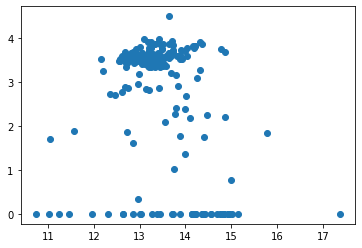

In [10]:
plt.scatter(glass['Na'],glass['Mg'])

In [11]:
X = glass.iloc[:,:-1]
Y = glass.iloc[:, -1] # -1 means last column

In [12]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [13]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [14]:
model = KNeighborsClassifier(n_neighbors = 10)

In [15]:
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=10)

In [16]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv = kfold)

In [17]:
results

array([0.5       , 0.81818182, 0.63636364, 0.81818182, 0.28571429,
       0.52380952, 0.42857143, 0.        , 0.14285714, 0.04761905])

In [18]:
results.mean()

0.42012987012987013

In [19]:
model.predict([[1.52,13.254,0.0,1.94,73.42,0.55,8.753,1.06,0.0]])

array([7], dtype=int64)

In [20]:
model.predict([[1.78,14.554,0.0,1.7,79.42,0.85,7.753,1.58,0.0]])

array([7], dtype=int64)

## Grid Search For Algorithm Tuning 

In [21]:
n_neighbors = list(range(1,51))
parameters = {'n_neighbors' : n_neighbors}

In [22]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [23]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


## Visualizing the CV results 

In [24]:
k_range = range(1, 51)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())

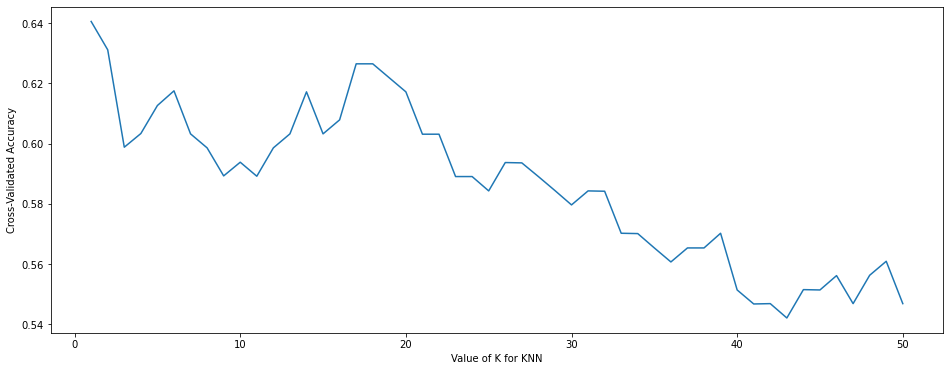

In [25]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [26]:
k_scores

[0.640531561461794,
 0.6311184939091916,
 0.598781838316722,
 0.6033222591362126,
 0.612624584717608,
 0.6174972314507199,
 0.6032115171650055,
 0.5985603543743079,
 0.5892580287929124,
 0.5937984496124031,
 0.5891472868217054,
 0.5985603543743079,
 0.6032115171650055,
 0.6171650055370985,
 0.6032115171650055,
 0.6078626799557032,
 0.626467331118494,
 0.626467331118494,
 0.6218161683277963,
 0.6171650055370985,
 0.6031007751937983,
 0.6031007751937983,
 0.5890365448504984,
 0.5890365448504984,
 0.5842746400885936,
 0.5936877076411959,
 0.5935769656699889,
 0.5890365448504983,
 0.5843853820598006,
 0.5796234772978959,
 0.5842746400885935,
 0.5841638981173864,
 0.5702104097452934,
 0.5700996677740863,
 0.5653377630121815,
 0.5606866002214839,
 0.5653377630121815,
 0.5653377630121816,
 0.5702104097452934,
 0.5513842746400887,
 0.546733111849391,
 0.546843853820598,
 0.5420819490586932,
 0.5514950166112957,
 0.5513842746400887,
 0.5561461794019934,
 0.546843853820598,
 0.5562569213732005,


In [27]:
df_accuracy = pd.DataFrame({'Value of k' : range(1,51),
                            'Accuracy' : k_scores})
df_accuracy

,Value of k,Accuracy
0,1,0.640532
1,2,0.631118
2,3,0.598782
3,4,0.603322
4,5,0.612625
5,6,0.617497
6,7,0.603212
7,8,0.598560
8,9,0.589258
9,10,0.593798


In [28]:
df_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
0,1,0.640532
1,2,0.631118
17,18,0.626467
16,17,0.626467
18,19,0.621816
5,6,0.617497
13,14,0.617165
19,20,0.617165
4,5,0.612625
15,16,0.607863


# For zoo dataset 

In [29]:
zoo=pd.read_csv("C:/Users/icon/Downloads/Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [30]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [31]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [32]:
zoo.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [33]:
zoo.catsize.unique()

array([1, 0], dtype=int64)

## Visualizations 

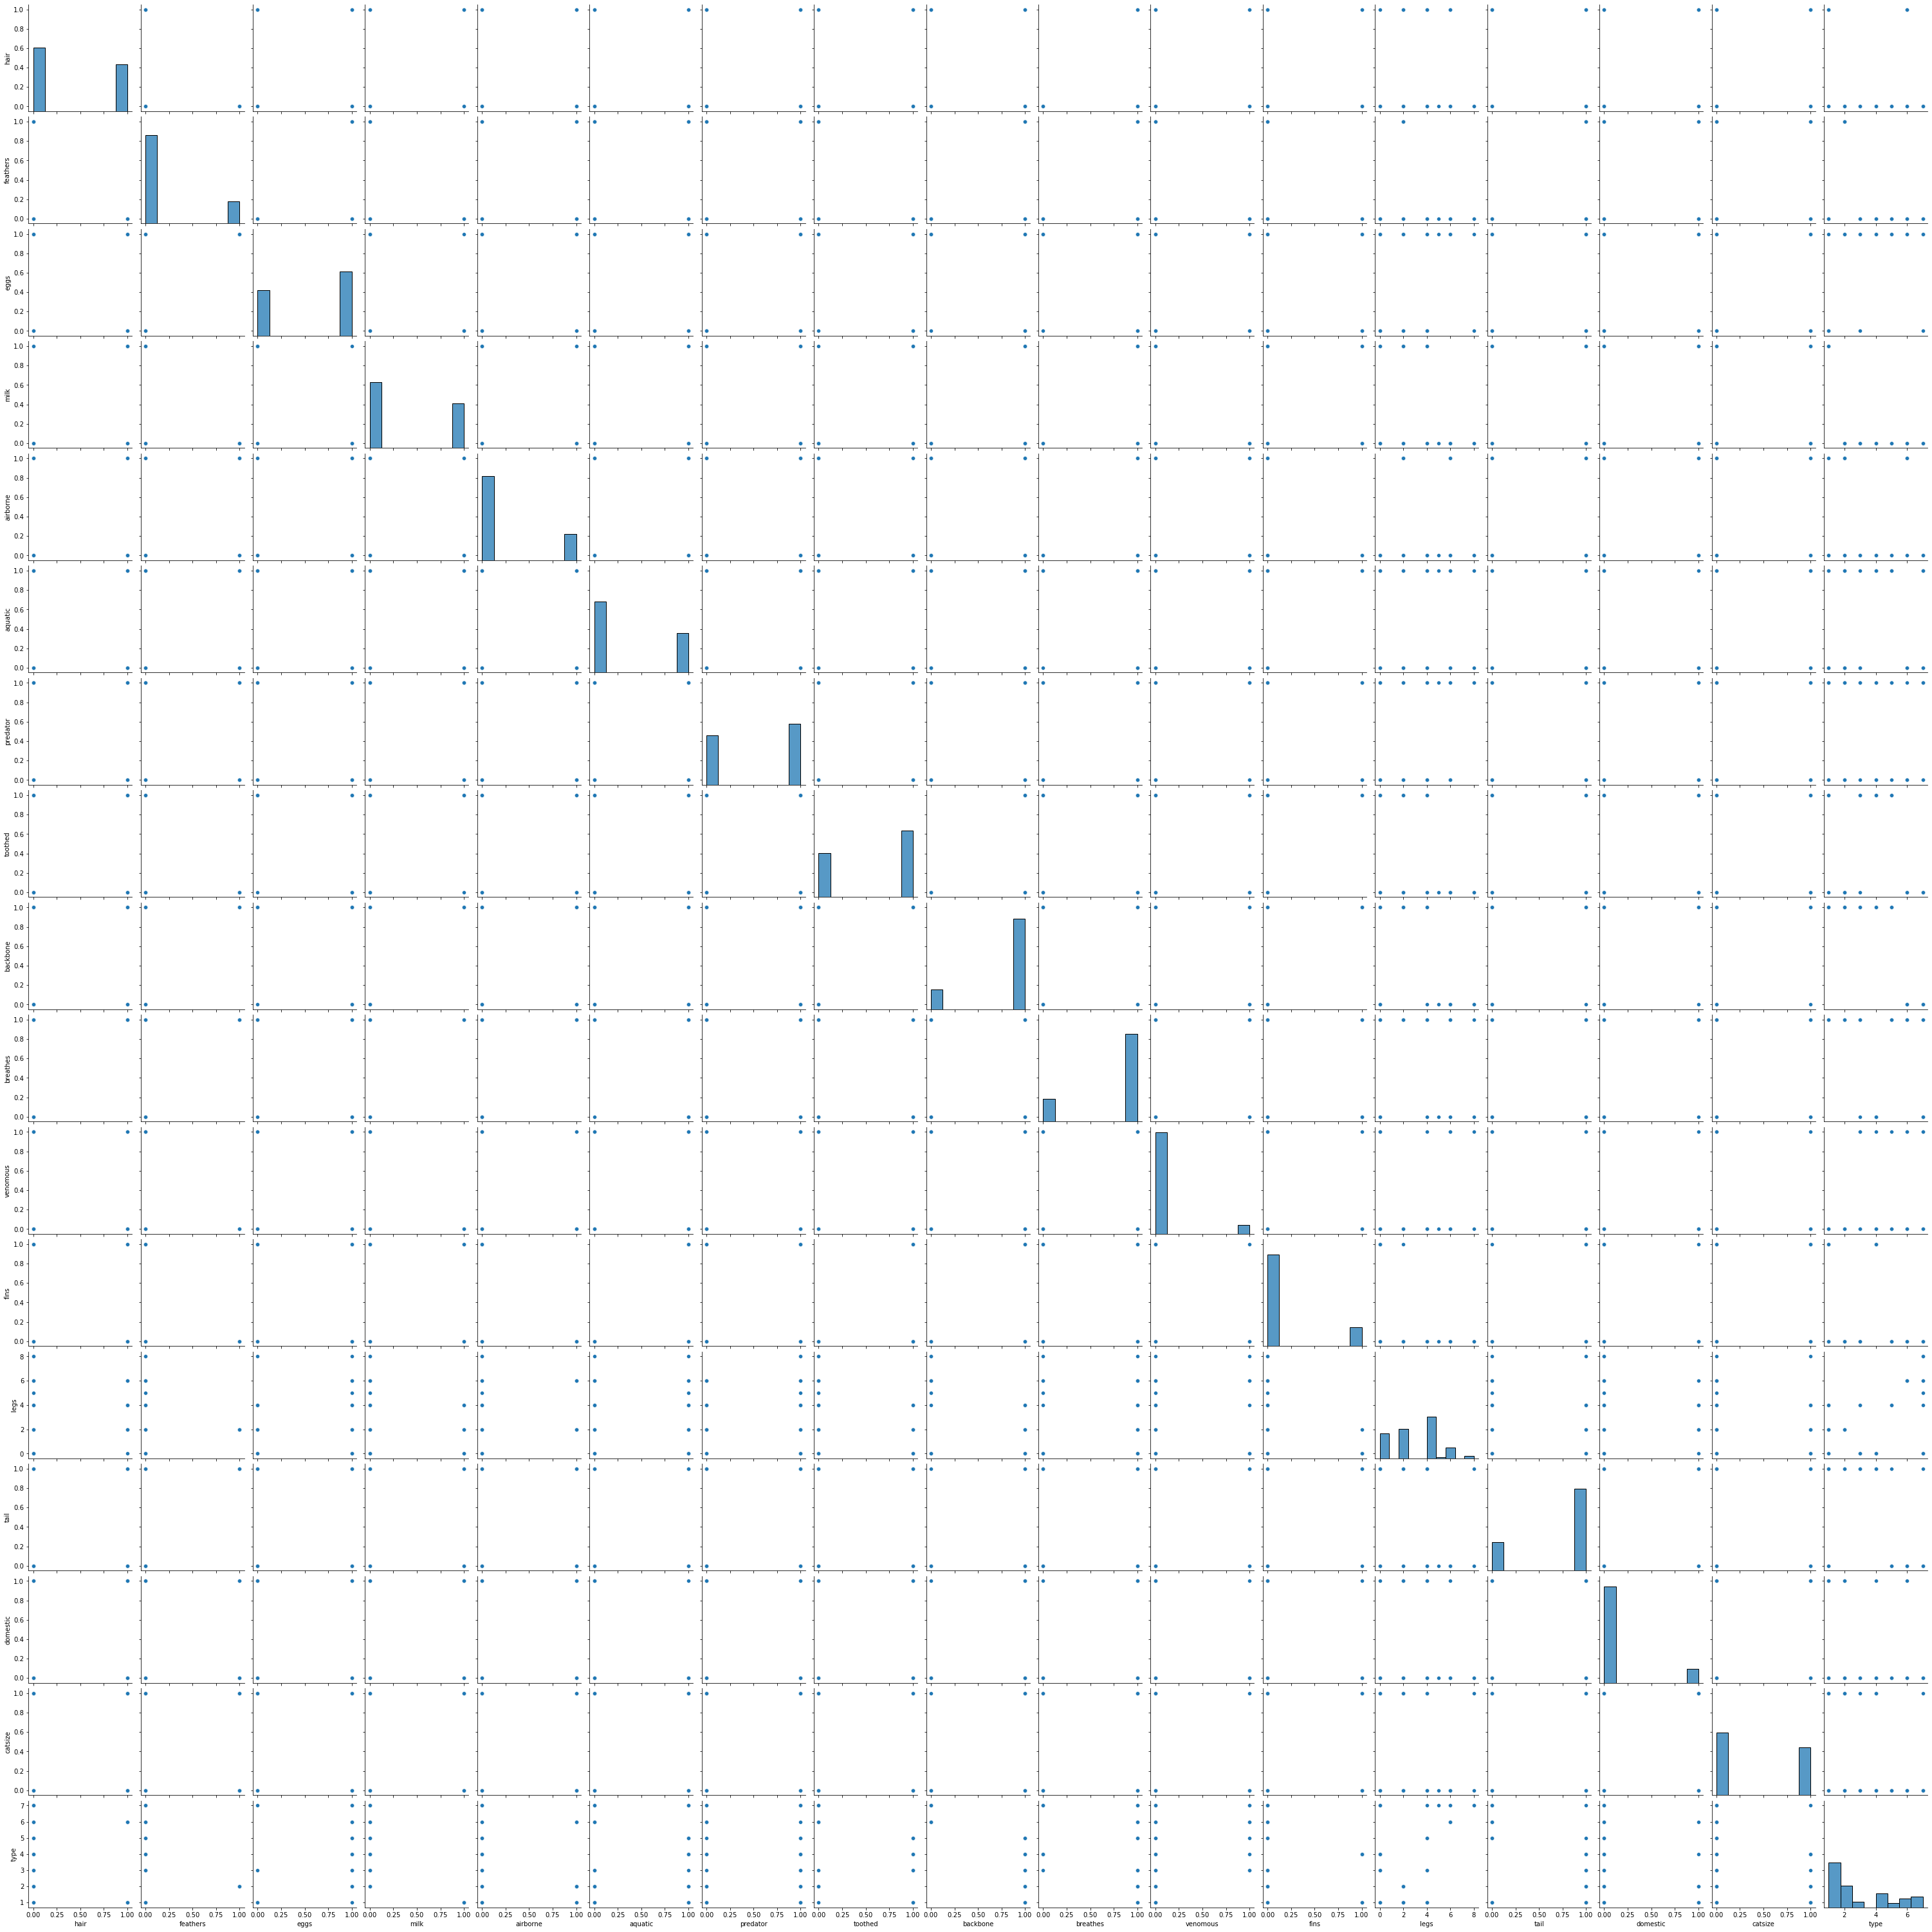

In [34]:
sns.pairplot(zoo)

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='legs', ylabel='catsize'>

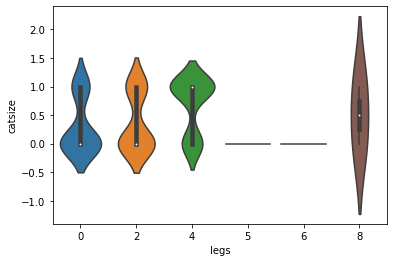

In [35]:
sns.violinplot(zoo['legs'],zoo['catsize'])

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='legs', ylabel='catsize'>

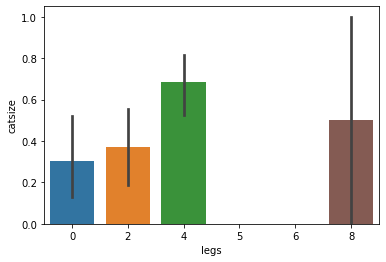

In [36]:
sns.barplot(zoo['legs'],zoo['catsize'])

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

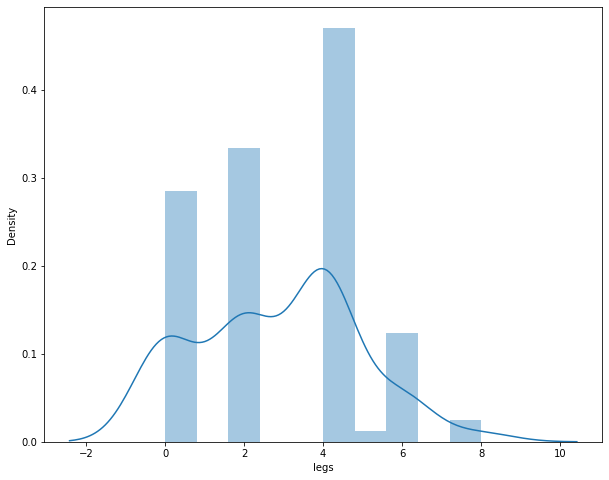

In [37]:
plt.figure(figsize=(10,8))
sns.distplot(zoo['legs'])
plt.show

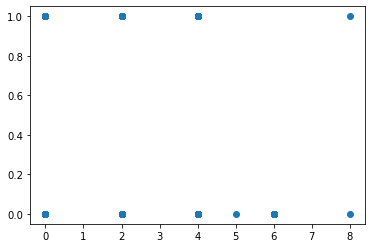

In [38]:
plt.scatter(zoo['legs'],zoo['catsize'])

In [39]:
X =zoo.drop(['animal name','catsize'],axis=1)
Y =zoo.iloc[:,16] # -1 means last column

In [40]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,7


In [41]:
Y

0      1
1      1
2      0
3      1
4      1
      ..
96     1
97     0
98     1
99     0
100    0
Name: catsize, Length: 101, dtype: int64

In [42]:
model1 = KNeighborsClassifier(n_neighbors = 12)

In [43]:
model1.fit(X,Y)

KNeighborsClassifier(n_neighbors=12)

In [44]:
kfold = KFold(n_splits=10)
results1 = cross_val_score(model1, X, Y, cv = kfold)

In [45]:
results1

array([0.90909091, 0.8       , 0.8       , 0.8       , 0.9       ,
       0.5       , 1.        , 0.8       , 0.6       , 0.6       ])

In [46]:
results1.mean()

0.7709090909090909

In [47]:
model1.predict([[1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1]])

array([1], dtype=int64)

In [48]:
model1.predict([[0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,4]])

array([0], dtype=int64)

## Grid Search For Algorithm Tuning 

In [49]:
n_neighbors = list(range(1,21))
parameters = {'n_neighbors' : n_neighbors}

In [50]:
model2 = KNeighborsClassifier()
grid = GridSearchCV(estimator = model2, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [51]:
print(grid.best_score_)
print(grid.best_params_)

0.7919047619047619
{'n_neighbors': 3}


## Visualizing the CV results 

In [52]:
k_range = range(1, 21)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())

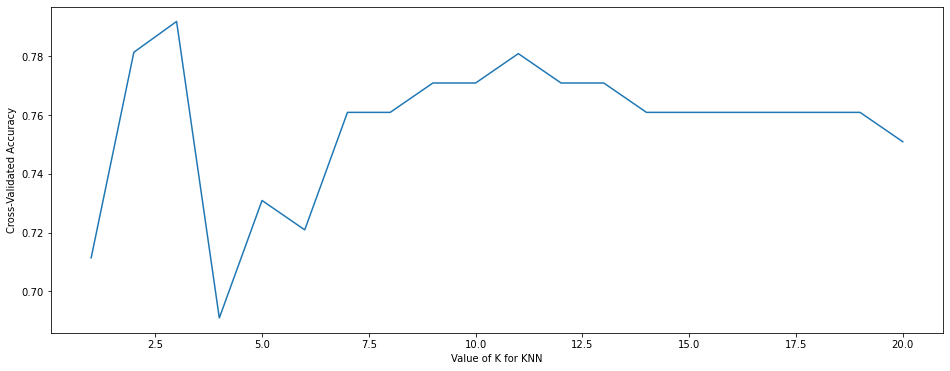

In [53]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [54]:
k_scores

[0.7114285714285714,
 0.7814285714285714,
 0.7919047619047619,
 0.6909523809523809,
 0.730952380952381,
 0.7209523809523809,
 0.760952380952381,
 0.7609523809523809,
 0.7709523809523808,
 0.7709523809523808,
 0.7809523809523811,
 0.7709523809523808,
 0.7709523809523808,
 0.7609523809523809,
 0.7609523809523809,
 0.7609523809523809,
 0.7609523809523809,
 0.7609523809523809,
 0.7609523809523809,
 0.7509523809523809]

In [55]:
df_accuracy = pd.DataFrame({'Value of k' : range(1,21),
                            'Accuracy' : k_scores})
df_accuracy

,Value of k,Accuracy
0,1,0.711429
1,2,0.781429
2,3,0.791905
3,4,0.690952
4,5,0.730952
5,6,0.720952
6,7,0.760952
7,8,0.760952
8,9,0.770952
9,10,0.770952


In [56]:
df_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
2,3,0.791905
1,2,0.781429
10,11,0.780952
8,9,0.770952
9,10,0.770952
11,12,0.770952
12,13,0.770952
6,7,0.760952
15,16,0.760952
18,19,0.760952
